In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
plt.rcParams['axes.labelsize'] = 8    
plt.rcParams['axes.titlesize'] = 9    
plt.rcParams['xtick.labelsize'] = 8   
plt.rcParams['ytick.labelsize'] = 8 
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['font.family']='Arial'

In [3]:
custom_order = [
        'centerE16N4geo50000', 'centerE16N4geo100000', 'centerE16N4geo150000',
        'centerE9N9geo50000', 'centerE9N9geo100000', 'centerE9N9geo150000',
        'centerE6N4geo50000', 'centerE6N4geo100000', 'centerE6N4geo150000',
        'uniformgeo',
        'centerX19Y4pca0.0015', 'centerX19Y4pca0.0025', 'centerX19Y4pca0.005',
        'uniformpca'
    ]

In [4]:
sfs_data = pd.read_csv('sfs_binned_summary.csv')
sfs_data

,Variant_Type,Panel,Bin_Center,Binned_SFS,Binned_Std
0,synonymous,H,1.414214,19.513923,0.196042
1,synonymous,H,2.828427,4.282202,0.206784
2,synonymous,H,5.656854,3.647889,0.237968
3,synonymous,H,11.661904,2.049816,0.320769
4,synonymous,H,24.392622,1.163884,0.327609
...,...,...,...,...,...
163,lof,C,5.656854,0.571942,0.023813
164,lof,C,11.661904,0.241226,0.018186
165,lof,C,24.392622,0.169037,0.028117
166,lof,C,59.160798,0.114349,0.074369


### Fig S12

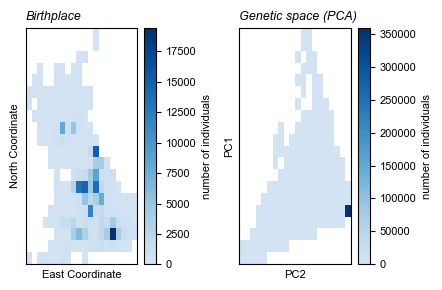

In [5]:
# function to map to bin
def map_to_bin(x,y,xedges,yedges):
    return [np.digitize(x,xedges)-1,np.digitize(y,yedges)-1]

# function to get bin center
def get_bin_center(bin_idx,xedges,yedges):
    x_idx, y_idx = bin_idx
    center_x = (xedges[x_idx] + xedges[x_idx + 1]) / 2
    center_y = (yedges[y_idx] + yedges[y_idx + 1]) / 2
    return [center_x, center_y]

df = pd.read_csv('../empirical/subsampling_SIR_v20250127/metadata/metadata_cleaned_wes.csv')
df_geo = df[(df['birth_east_coord'].notna()) & (df['birth_UKelsewhere']!='Elsewhere') & (df['used_in_pca']==1) & (df['within_1epsilon_pca']==True)]
df_pca = df[(df['used_in_pca']==1)]

fig,ax = plt.subplots(1,2,figsize=(4.49,3))


x = df_geo['birth_east_coord']
y = df_geo['birth_north_coord']
counts, xedges, yedges = np.histogram2d(x,y,bins=20)
cmap = plt.get_cmap('Blues')
cmap = ListedColormap(cmap(np.linspace(0.18, 1, cmap.N)))
cmap.set_under('white')

im = ax[0].imshow(counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.colorbar(im,label='number of individuals',ax=ax[0])
ax[0].set_title('Birthplace',fontstyle='italic',loc='left')
ax[0].set_ylabel('North Coordinate')
ax[0].set_xlabel('East Coordinate')


x = df_pca['PC1']
y = df_pca['PC2']
counts, xedges, yedges = np.histogram2d(x,y,bins=20)
# cmap = plt.get_cmap('Blues')
# cmap.set_under('white')
im = ax[1].imshow(counts.T, origin='lower', aspect='auto', 
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          cmap=cmap,vmin=1e-8)
plt.colorbar(im,label='number of individuals',ax=ax[1])
ax[1].set_title('Genetic space (PCA)',fontstyle='italic',loc='left')
ax[1].set_ylabel('PC1')
ax[1].set_xlabel('PC2')

for a in ax.flatten():
    a.tick_params(axis='both', which='both', length=0, labelbottom=False, labelleft=False)

plt.tight_layout()
# plt.show()
plt.savefig('density_plots.pdf', dpi=1200, bbox_inches='tight')

### Fig S14

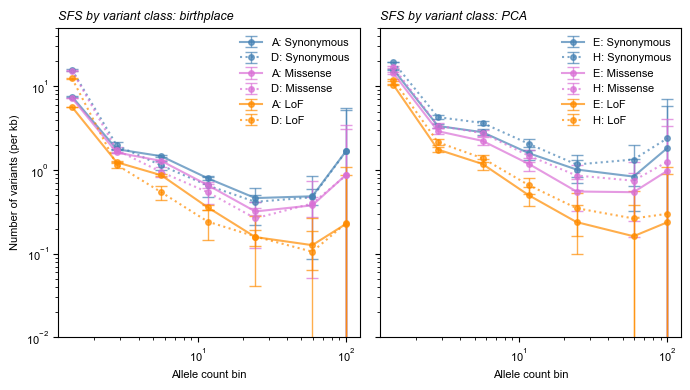

In [7]:
sfs_data = pd.read_csv('sfs_binned_summary.csv')
colors_vt = ['steelblue','orchid','darkorange']
fig, axes = plt.subplots(1, 2, figsize=(7.01, 4), sharex=True, sharey=True)
vartypes=['synonymous','missense','lof']
lt = ['-','dotted']
for i, vt in enumerate(vartypes):
    if vt=='synonymous':
        vt_cap='Synonymous'
    elif vt=='missense':
        vt_cap='Missense'
    elif vt=='lof':
        vt_cap='LoF'
    sfs_vt = sfs_data[sfs_data['Variant_Type']==vt]
    for k,panel in enumerate(['A','D']):
        panel_data = sfs_vt[sfs_vt['Panel']==panel]
        axes[0].errorbar(panel_data['Bin_Center'],panel_data['Binned_SFS'], yerr=panel_data['Binned_Std'],
                        label=f"{panel}: {vt_cap}",linestyle = lt[k],marker='o', capsize=4, markersize=4, elinewidth=1, alpha=0.7,color=colors_vt[i])
    for k,panel in enumerate(['E','H']):
        panel_data = sfs_vt[sfs_vt['Panel']==panel]
        axes[1].errorbar(panel_data['Bin_Center'],panel_data['Binned_SFS'], yerr=panel_data['Binned_Std'],
                        label=f"{panel}: {vt_cap}",linestyle = lt[k],marker='o', capsize=4, markersize=4, elinewidth=1, alpha=0.7,color=colors_vt[i])
       
    #     for i, panel in enumerate(panels):
    # panel_data = sfs_lof[sfs_lof['Panel'] == panel]
    # axes['sfs_3'].errorbar(panel_data['Bin_Center'], panel_data['Binned_SFS'], yerr=panel_data['Binned_Std'], 
    #             label=f"{panel}", linestyle='-', marker='o', capsize=4, markersize=4, elinewidth=1, alpha=0.7,color=colors[i])
    # panel_data = sfs_mis[sfs_mis['Panel'] == panel]
    # axes['sfs_2'].errorbar(panel_data['Bin_Center'], panel_data['Binned_SFS'], yerr=panel_data['Binned_Std'], 
    #             label=f"{panel}", linestyle='-', marker='o', capsize=4, markersize=4, elinewidth=1, alpha=0.7,color=colors[i])
    # panel_data = sfs_syn[sfs_syn['Panel'] == panel]
    # axes['sfs_1'].errorbar(panel_data['Bin_Center'], panel_data['Binned_SFS'], yerr=panel_data['Binned_Std'], 
    #             label=f"{panel}", linestyle='-', marker='o', capsize=4, markersize=4, elinewidth=1, alpha=0.7,color=colors[i])

    
# vartypes=['Synonymous','Missense','LoF']
title = ['birthplace','PCA']
for i in [0,1]:
    axes[i].set_yscale('log')
    axes[i].set_xscale('log')
    axes[i].set_ylim(1e-2,5e1)
    axes[i].set_title(f'SFS by variant class: {title[i]}', loc='left', fontstyle='italic')
    axes[i].set_xlabel("Allele count bin")
    if i == 0:
        axes[i].set_ylabel("Number of variants (per kb)")
    handles, labels = axes[i].get_legend_handles_labels()
    # order = [0,1,2,3,4,5]
    axes[i].legend(frameon=False,loc='upper right')#[handles[i] for i in order], [labels[i] for i in order],loc='upper right',ncol=1,frameon=False)
    
plt.tight_layout()
plt.savefig(f'sfs_varclass_twopanel.pdf')


### Fig S16

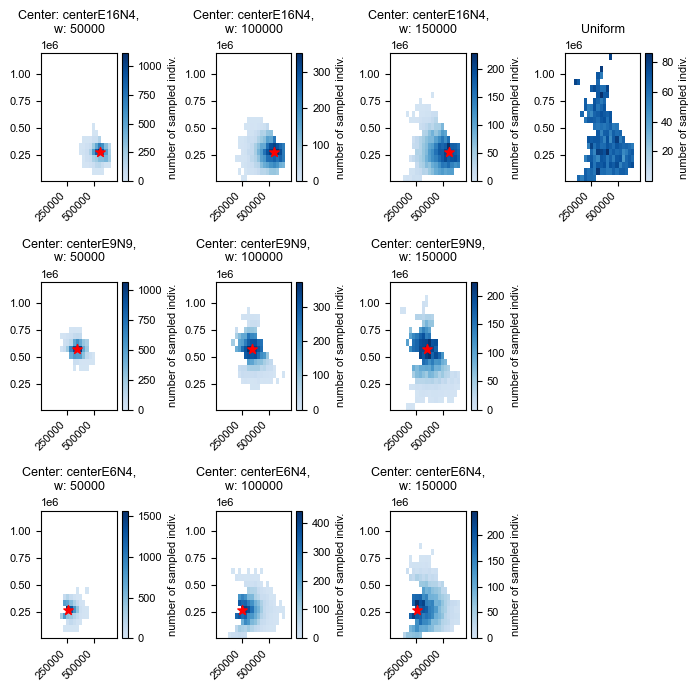

In [8]:
# cmap = plt.get_cmap('Blues')
# cmap.set_under('white')
x = df_geo['birth_east_coord']
y = df_geo['birth_north_coord']
counts, xedges, yedges = np.histogram2d(x,y,bins=20)
reps = [0]#np.arange(10)

center_bin_1 = [16,4]
center_bin_2 = [9,9]
center_bin_3 = [6,4]
center_coord_1 = get_bin_center(center_bin_1,xedges,yedges)
center_coord_2 = get_bin_center(center_bin_2,xedges,yedges)
center_coord_3 = get_bin_center(center_bin_3,xedges,yedges)

w_list = ['50000','100000','150000']
centers = ['centerE16N4','centerE9N9','centerE6N4']
vartypes = ['lof']

for vt in vartypes:
    for rep in reps:
        fig,ax=plt.subplots(3,4,figsize=(7.01,7.01))
        for a in ax.flat:
            plt.setp(a.get_xticklabels(), rotation=45, ha="right")
        idlist_unif = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/ids/chr1_{vt}_uniformgeo_nSIR10000_nSIRreps10.SIRexamples',sep = ' ', header=None)
        ids_unif = idlist_unif[idlist_unif[1]==rep]
        ids_unif.rename(columns={2: 'id'}, inplace=True)
        temp = pd.merge(df_geo, ids_unif, on=['id'], how='inner')
        # temp = temp.drop_duplicates()
        hist_temp = ax[0,3].hist2d(temp['birth_east_coord'], temp['birth_north_coord'], bins=[xedges, yedges], cmap=cmap,vmin=1e-8)
        ax[0,3].axis('equal')
        ax[0,3].set_title('Uniform')
        cbar = fig.colorbar(hist_temp[3], ax=ax[0,3], orientation='vertical',label='number of sampled indiv.')
    
        for i,c in enumerate(centers):
            for j,w in enumerate(w_list):
                idlist = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/ids/chr1_{vt}_{c}geo{w}_nSIR10000_nSIRreps10.SIRexamples',delimiter=' ',header=None)
                ## subset by rep ## 
                ids = idlist[idlist[1]==rep]
                ids.rename(columns={2: 'id'}, inplace=True)
                temp = pd.merge(df_geo, ids, on=['id'], how='inner')
                
                hist_temp = ax[i,j].hist2d(temp['birth_east_coord'], temp['birth_north_coord'], bins=[xedges, yedges], cmap=cmap,vmin=1e-8)
                ax[i,j].axis('equal')
                ax[i,j].set_title(f'Center: {c},\nw: {w}')
                cbar = fig.colorbar(hist_temp[3], ax=ax[i,j], orientation='vertical',label='number of sampled indiv.')
                if c=='centerE16N4':
                    ax[i,j].scatter(center_coord_1[0],center_coord_1[1],s=50,marker="*",c='r')#,label='center bin 1')
                if c=='centerE9N9':
                    ax[i,j].scatter(center_coord_2[0],center_coord_2[1],s=50,marker="*",c='r')#,label='center bin 2')
                if c=='centerE6N4':
                    ax[i,j].scatter(center_coord_3[0],center_coord_3[1],s=50,marker="*",c='r')#,label='center bin 3')
    
        ax[1,3].axis('off')
        ax[2,3].axis('off')
        plt.tight_layout()
        # plt.show()
        plt.savefig('geo_locations.pdf')
        # plt.savefig(f'../plots_20241028/loc_dist/loc_dist_geo_chr1_{vt}_rep{rep}.png')
